圆形投针法$P\{ X^2 +Y^2 \leqslant 1\} = \frac{\pi}{4}$

选做：数值模拟比较蒲丰投针法和圆形投针法的无偏性和渐进无偏性

做法：

无偏性指统计量的期望就是准确值，渐进无偏性指统计量的期望不是准确值，而与样本数n有关，当$n \rightarrow \infty$，统计量的期望趋于准确值。

故要区别渐进无偏和无偏，可对于确定的样本数n，先进行m次估计，得到m个估计值，此即统计量的m个样本值，再计算这些估计值的均值$\theta$作为统计量的期望的估计，令m逐渐增大，如果是无偏估计，则$\theta$应逐渐趋于准确值，而渐进无偏估计则不会.再令$n \rightarrow \infty$,若$\theta$趋于准确值，则是渐进无偏估计。

In [2]:
import numpy as np
from matplotlib import pyplot as plt

3.1397962900167036

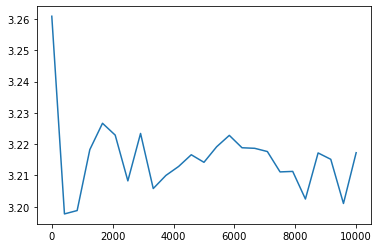

In [18]:
#蒲丰投针
def puff_1_time(N): #进行一次估计，样本数为N
    a,l = 4.,3.   #参数选a =4 ，l = 3
    x = a/2 *np.random.rand(N)
    phi = np.pi *np.random.rand(N)
    M = sum(x <= l*np.sin(phi)/2)
    return 2*l/a *N/M

def puff(mtimes,nsamples): #进行m次估计
    X = []
    for i in range(mtimes):
        X.append(puff_1_time(nsamples))
    return np.mean(X) #返回统计量期望的估计值

ms = np.linspace(1,10000,25,dtype=int) #进行1~10000次估计,间隔为10000/25 = 800
thetas = [puff(m,50) for m in ms] #每次估计中进行50次抽样
plt.plot(ms,thetas)  #画出统计量期望的估计值随估计次数的变化
plt.show

puff_1_time(500000) #样本最多的一次估计为10000*50=500000个样本


可以看到统计量期望的估计值并没有趋于$\pi$,最多样本数为$m*n = 10000*50 = 50 0000$,此时进行一次大样本的实验算得$\pi$的估计值接近$\pi$。

这说明蒲丰投针法是渐进无偏的而不是无偏的。

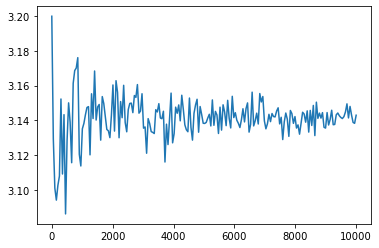

In [12]:
#圆形投针法

def circle_1_time(N): #进行一次估计，样本数为N
    x = np.random.rand(N)
    y = np.random.rand(N)
    M = sum(x**2 + y**2 <= 1)
    return 4*M/N

def cirle(mtimes,nsamples): #进行m次估计
    X = []
    for i in range(mtimes):
        X.append(circle_1_time(nsamples))
    return np.mean(X) #返回统计量期望的估计值

ms = np.linspace(1,10000,200,dtype=int)
thetas = [cirle(m,10) for m in ms]
plt.plot(ms,thetas)
plt.show

可以看到统计量期望是趋于$\pi$的，这说明圆形投针法是无偏的。

## Monte Carlo 方法

- 两个随意写出的数，互素的概率为 $\frac{}{}$
- $X,Y \sim U(0,1)$,$(x,y,1)$构成一个钝角三角形的概率为 $\frac{\pi - 2}{4}$

### 随机投点

例题：计算标准正态分布$[0,1]$上定积分

In [ ]:
import numpy as np

def intg(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    m = sum( y <= np.exp(-x**2/2)/np.sqrt(2*np.pi)  )
    return m/n

intg(100000)

0.34156

In [ ]:
#[2,5]上的积分
def phi(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)


def F(Intg,a = 2,b = 5,c = 0,d = 1):
    return (b-a)*(d-c)*Intg + (b-a)*c 


F(Intg=intg(10000))

1.0203